In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
from skimage import color
import itertools as it
import math

import sys
sys.path.append("..")
from src import hierarchic_blending_operator
from src import color_converter
from src import color_operations
from src import color_schemes
from src import picture_worker
from src import helper

## Zwei Gaussians
Einer statisch, einer bewegt sich in jeder möglichen Richtung

In [2]:
size = 400

### Statischer Gaussian

In [3]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
mu_x, mu_y = 2,2
variance_x, variance_y = 5,5

In [4]:
gaussian_static = [x_min, x_max, y_min, y_max, mu_x, variance_x, mu_y, variance_y, size]

In [5]:
colorscheme_generator = color_schemes.create_color_brewer_colorscheme
colorscheme_names = ["blue", "orange", "green", "red", "purple"]

In [6]:
colorschemes = [{"color_scheme": colorscheme_generator, "colorscheme": colorscheme_name} for colorscheme_name in colorscheme_names]

In [7]:
background_colorschemes = {"color_scheme": colorscheme_generator, "colorscheme": "grey"}

In [8]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
mu_x, mu_y = 0,0
variance_x, variance_y = 5,5

var_x, var_y = [2,5,10,15,20], [15,20]
gaussians_2d = []
for i,mu_y in enumerate([-5,-2,0,2,5]):
    for j,mu_x in enumerate([-5,-2,0,2,5]):
        if mu_y > 0:
            variance_y = var_y[i-3]
            variance_x = var_x[j]
        else: variance_x = 5
        gaussians_2d.append([x_min, x_max, y_min, y_max, mu_x, variance_x, mu_y, variance_y, size])

In [9]:
gaussians_2 = []
for i in range(len(gaussians_2d)):
    gaussians_2.append([gaussian_static, gaussians_2d[i]])

In [10]:
def plot_contour_lines_gaussian(gaussian, colorscheme, level = 8):
    print(gaussian)
    x,y,z = helper.get_gaussian(*gaussian)
    z_min, z_max = np.min(z), np.max(z)
    contours = picture_worker.find_contour_lines(z, level)
    colors = picture_worker.get_colors(z, **colorscheme, num_of_levels = level, lvl_white=0)
    for i, color in zip(contours[:level], colors[:level]):
        for contour in i:
            plt.plot(contour[:, 1], contour[:, 0], linewidth=1, color=color)

In [15]:
def plot_contour_lines_gaussians(gaussians, colorschemes, borders = [0, 1], level = 10, linewidth=2, split = False, verbose=False):
    z_list = helper.generate_gaussians(gaussians)
    z_min, z_max, z_sum = helper.generate_weights(z_list)
    # img_list = []
    lower_border = borders[0]
    upper_border = borders[1]
    print('\n'.join("{}".format(gau[4:-1]) for gau in gaussians))
    img, _ = picture_worker.get_colorgrid(z_sum, **background_colorschemes, split = False, num_of_levels= 25, verbose = verbose)
    plt.imshow(img, interpolation='nearest')
    for z, colorscheme in zip(z_list, colorschemes[1:]):
        z_min_weight = (upper_border-lower_border)*(np.min(z) - z_min) / (z_max - z_min)+lower_border
        z_max_weight = (upper_border-lower_border)*(np.max(z) - z_min) / (z_max - z_min)+lower_border   
        contours = picture_worker.find_contour_lines(z, level)
        colors = picture_worker.get_colors(z, **colorscheme, num_of_levels = level, lvl_white=0,min_value = z_min_weight, max_value = z_max_weight, verbose = verbose)
        for i, color in zip(contours[:level], colors[:level]):
            for contour in i:
                plt.plot(contour[:, 1], contour[:, 0], linewidth=linewidth, color=color)
                plt.axis("off")
    plt.subplots_adjust(bottom=0.0, left=0, right=2, top=2)

[2, 5, 2, 5]
[-5, 5, -2, 5]


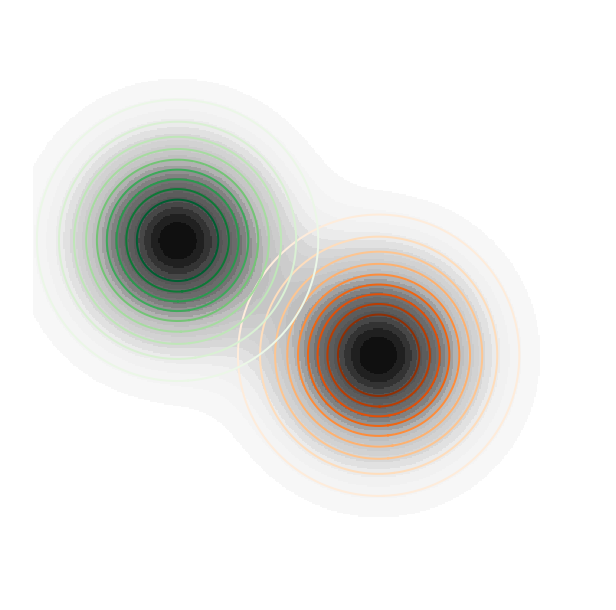

In [17]:
plot_contour_lines_gaussians(gaussians_2[5], colorschemes)